# Assignment 2_2: Hopfield Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utility import *
from hopfield import HopfieldNetwork

In [2]:
p0 = reshape_vector_to_image('p0.csv')
p1 = reshape_vector_to_image('p1.csv')
p2 = reshape_vector_to_image('p2.csv')

data = np.array([p0.reshape(-1), p1.reshape(-1), p2.reshape(-1)])
net = HopfieldNetwork(data)

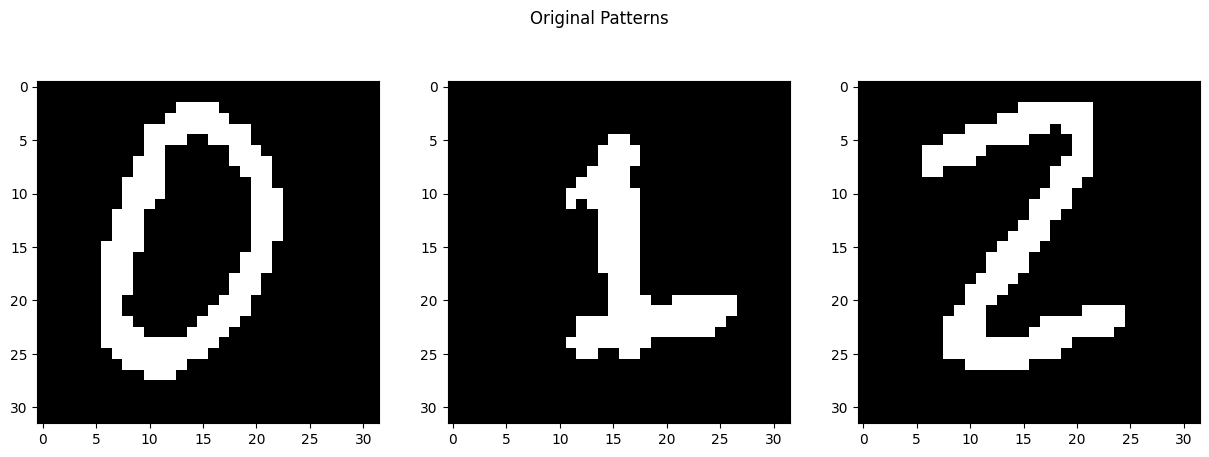

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle('Original Patterns')

axs[0].imshow(p0, cmap='gray')
axs[1].imshow(p1, cmap='gray')
axs[2].imshow(p2, cmap='gray')

## Digit: 0

In [4]:
# compute the 2 noisy images
p0_05 = distort_image(p0, 0.05)
p0_10 = distort_image(p0, 0.10)
p0_25 = distort_image(p0, 0.25)

In [5]:
p0_05_retrieved, e05_history, o05_history = net(p0_05.reshape(-1), true_pattern=p0.reshape(-1), history=True)
p0_10_retrieved, e10_history, o10_history = net(p0_10.reshape(-1), true_pattern=p0.reshape(-1), history=True)
p0_25_retrieved, e25_history, o25_history = net(p0_25.reshape(-1), true_pattern=p0.reshape(-1), history=True)

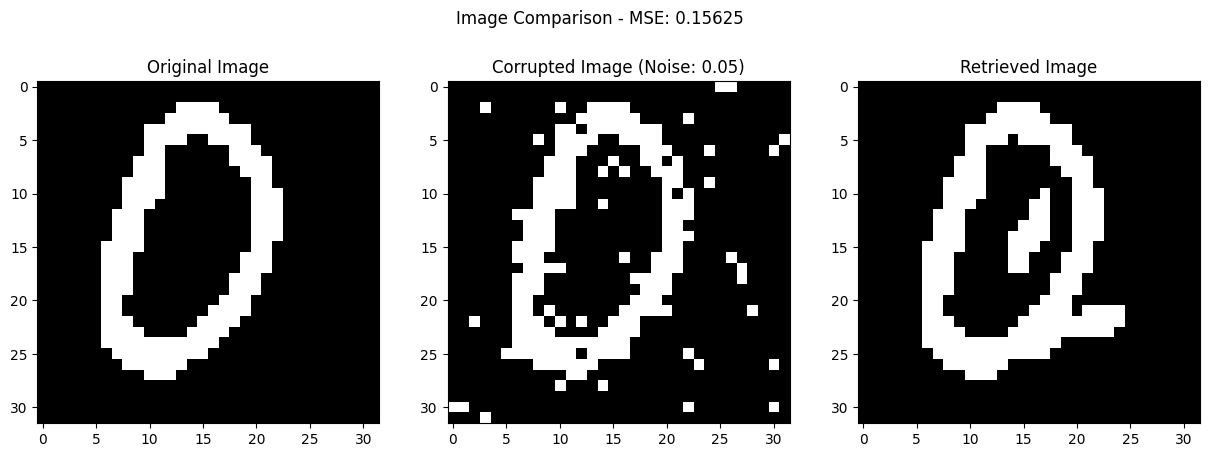

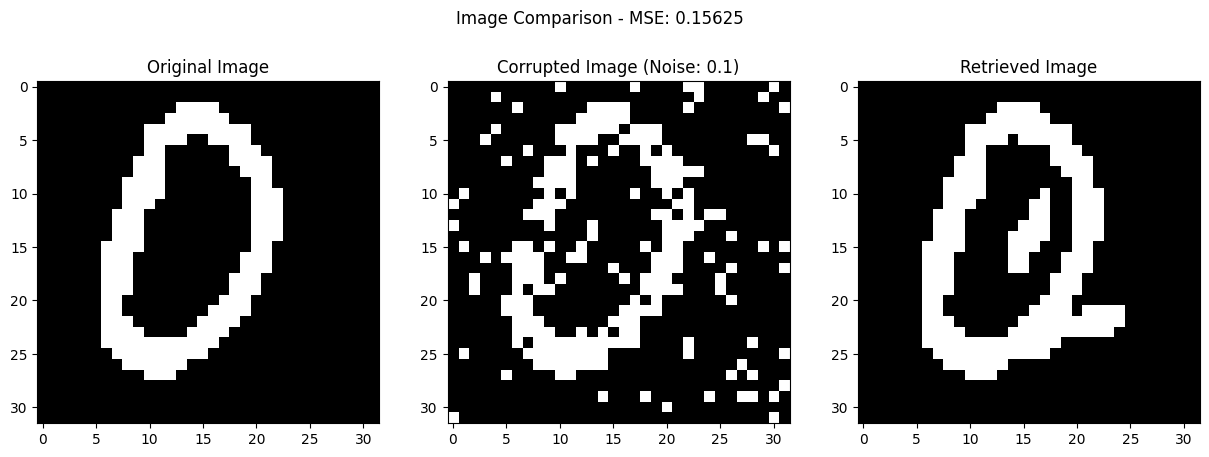

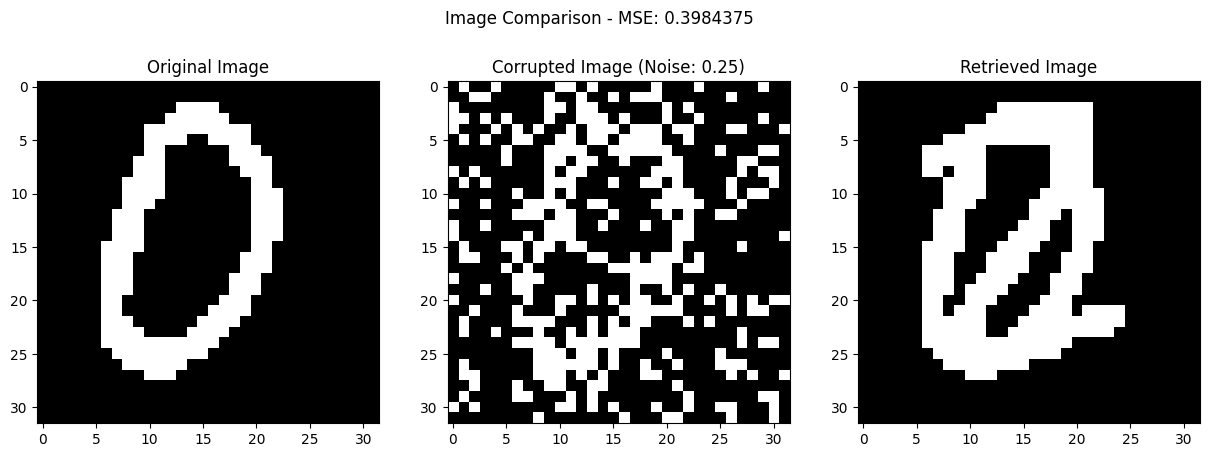

In [6]:
plot_images(p0, p0_05, p0_05_retrieved.reshape(p0.shape), noise=0.05)
plot_images(p0, p0_10, p0_10_retrieved.reshape(p0.shape), noise=0.10)
plot_images(p0, p0_25, p0_25_retrieved.reshape(p0.shape), noise=0.25)

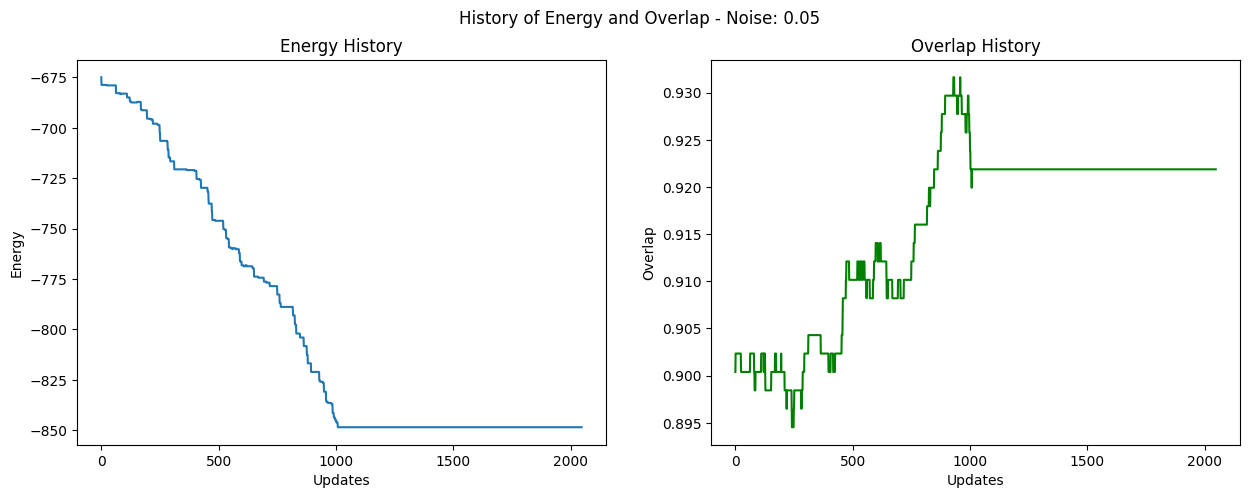

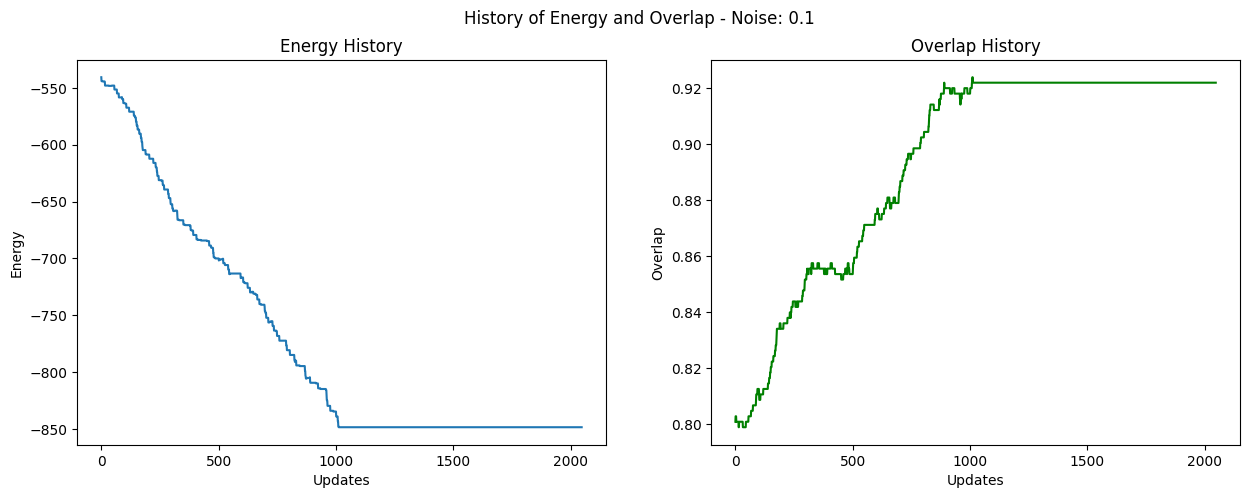

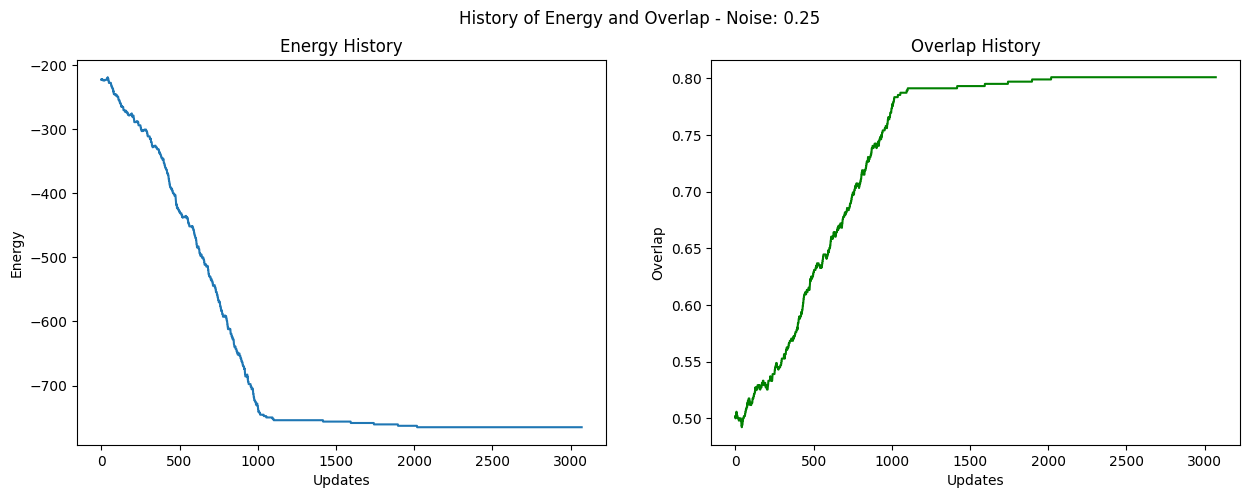

In [7]:
plot_history(e05_history, o05_history, noise=0.05)
plot_history(e10_history, o10_history, noise=0.10)
plot_history(e25_history, o25_history, noise=0.25)

## Digit: 1

In [8]:
# compute the 2 noisy images
p1_05 = distort_image(p1, 0.05)
p1_10 = distort_image(p1, 0.10)
p1_25 = distort_image(p1, 0.25)

In [9]:
p1_05_retrieved, e05_history, o05_history = net(p1_05.reshape(-1), true_pattern=p1.reshape(-1), history=True)
p1_10_retrieved, e10_history, o10_history = net(p1_10.reshape(-1), true_pattern=p1.reshape(-1), history=True)
p1_25_retrieved, e25_history, o25_history = net(p1_25.reshape(-1), true_pattern=p1.reshape(-1), history=True)

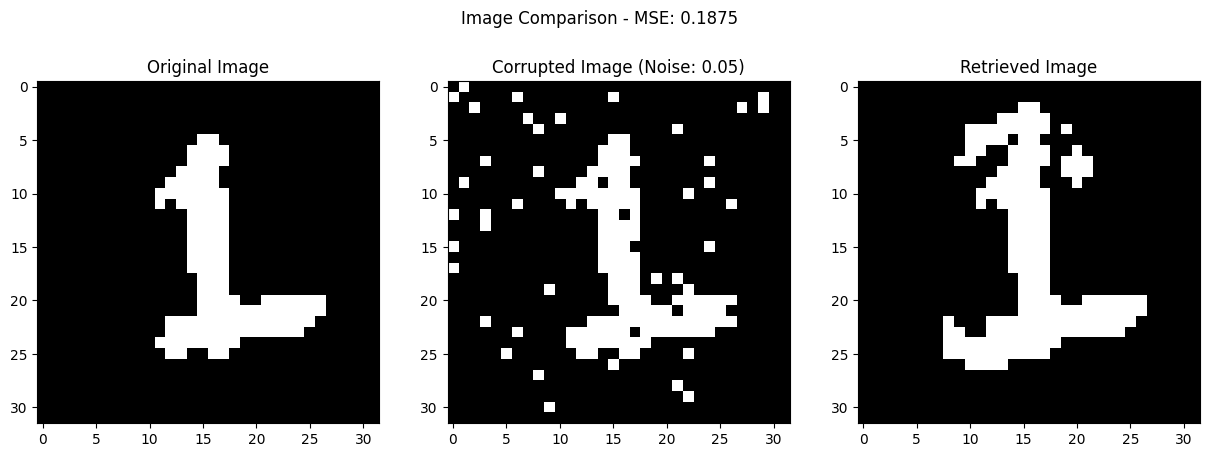

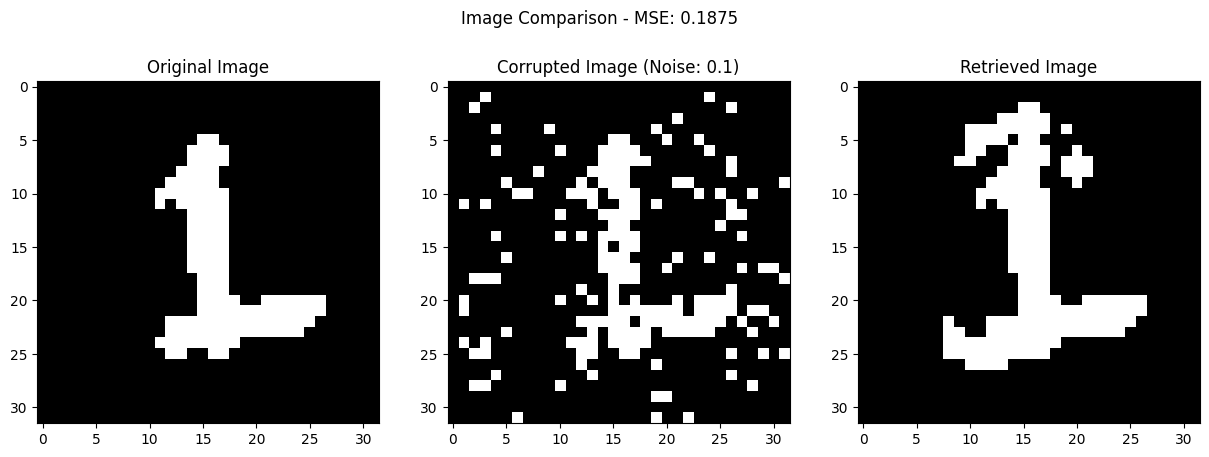

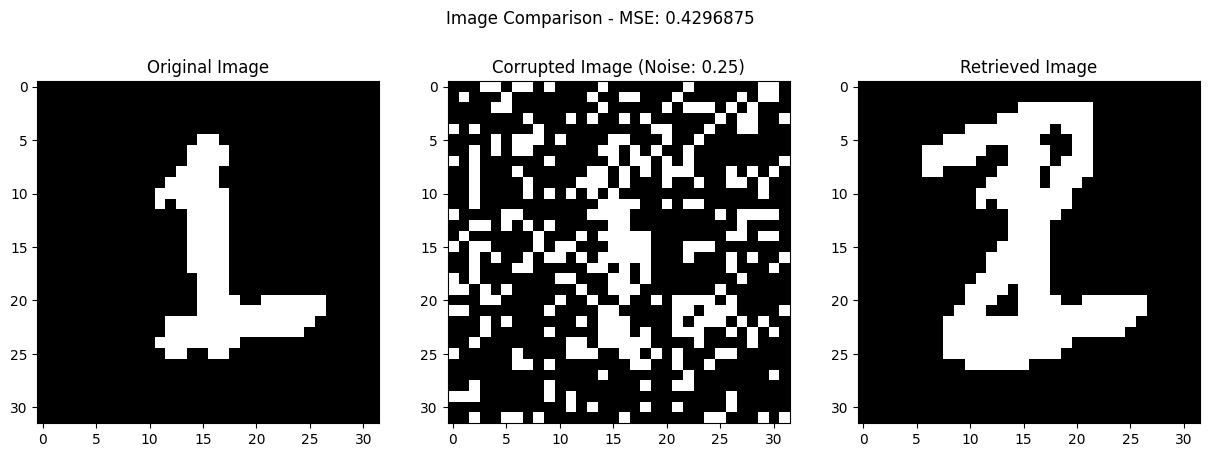

In [10]:
plot_images(p1, p1_05, p1_05_retrieved.reshape(p0.shape), noise=0.05)
plot_images(p1, p1_10, p1_10_retrieved.reshape(p0.shape), noise=0.10)
plot_images(p1, p1_25, p1_25_retrieved.reshape(p0.shape), noise=0.25)

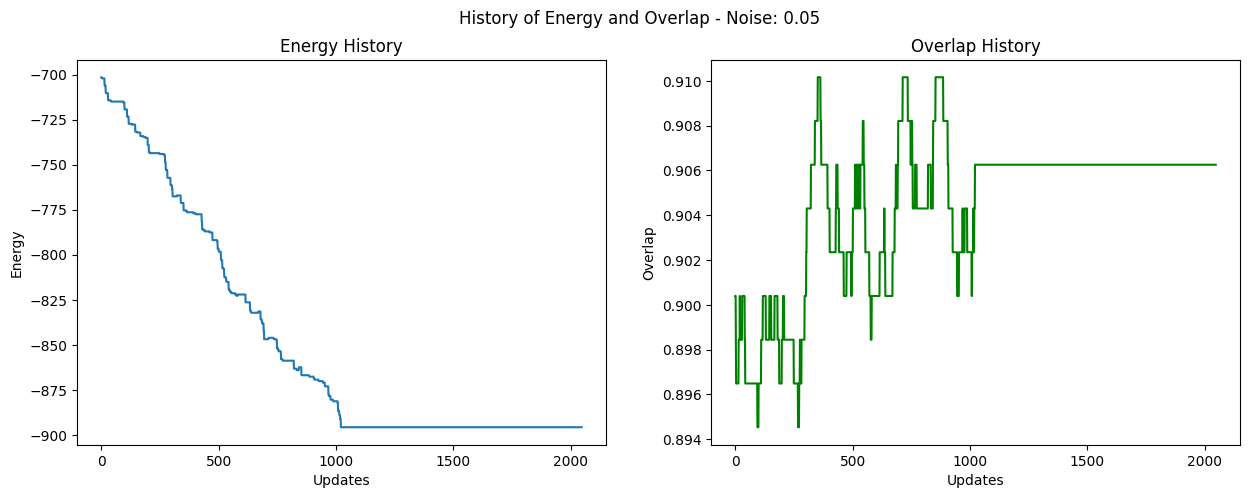

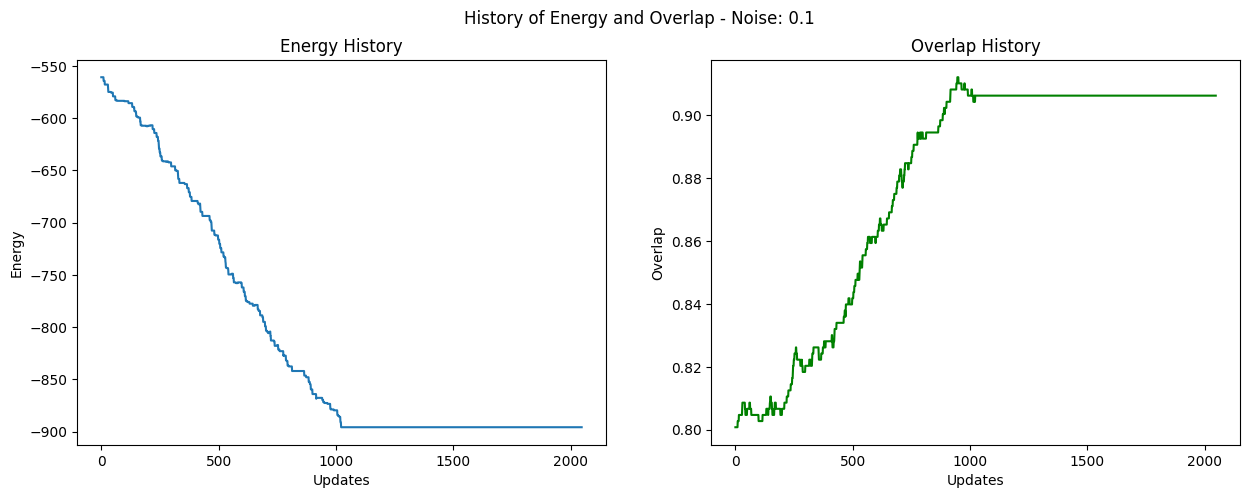

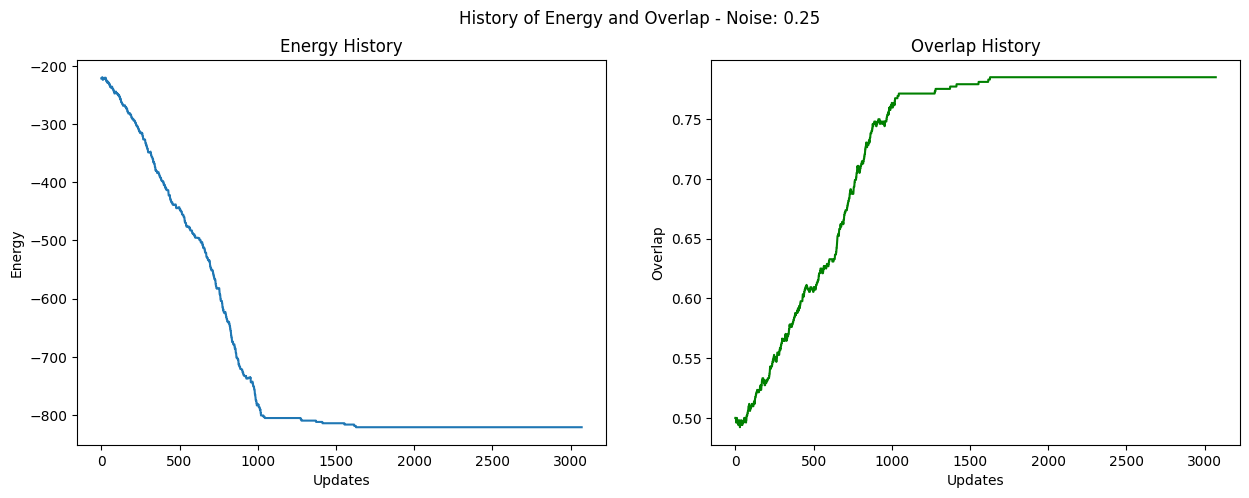

In [11]:
plot_history(e05_history, o05_history, noise=0.05)
plot_history(e10_history, o10_history, noise=0.10)
plot_history(e25_history, o25_history, noise=0.25)

## Digit: 2

In [12]:
# compute the 2 noisy images
p2_05 = distort_image(p2, 0.05)
p2_10 = distort_image(p2, 0.10)
p2_25 = distort_image(p2, 0.25)

In [13]:
p2_05_retrieved, e05_history, o05_history = net(p2_05.reshape(-1), true_pattern=p2.reshape(-1), history=True)
p2_10_retrieved, e10_history, o10_history = net(p2_10.reshape(-1), true_pattern=p2.reshape(-1), history=True)
p2_25_retrieved, e25_history, o25_history = net(p2_25.reshape(-1), true_pattern=p2.reshape(-1), history=True)

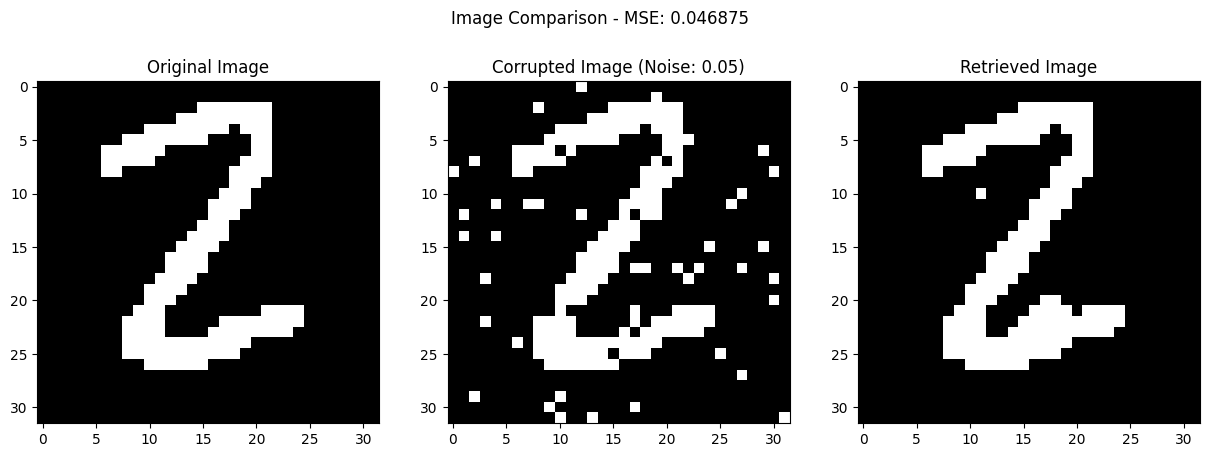

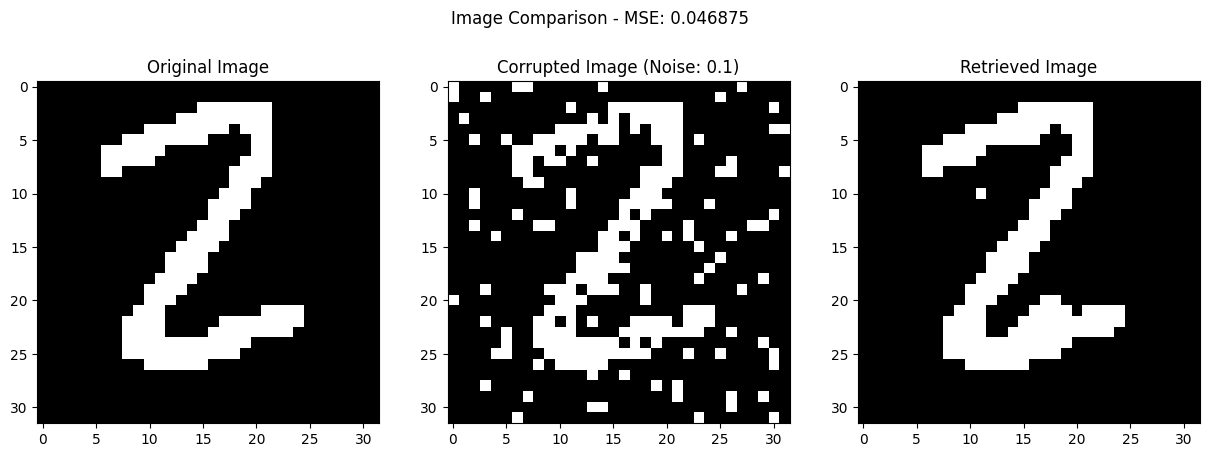

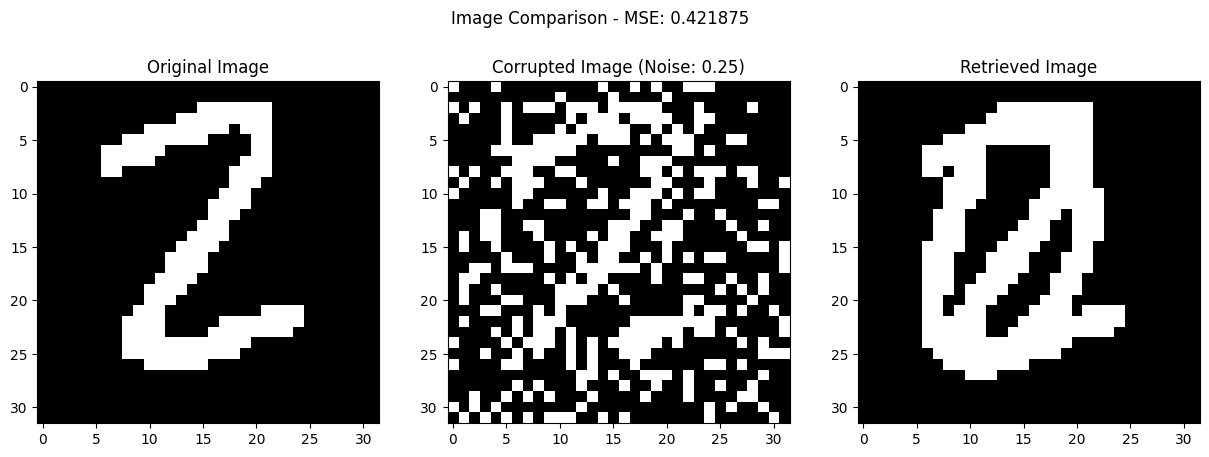

In [14]:
plot_images(p2, p2_05, p2_05_retrieved.reshape(p0.shape), noise=0.05)
plot_images(p2, p2_10, p2_10_retrieved.reshape(p0.shape), noise=0.10)
plot_images(p2, p2_25, p2_25_retrieved.reshape(p0.shape), noise=0.25)

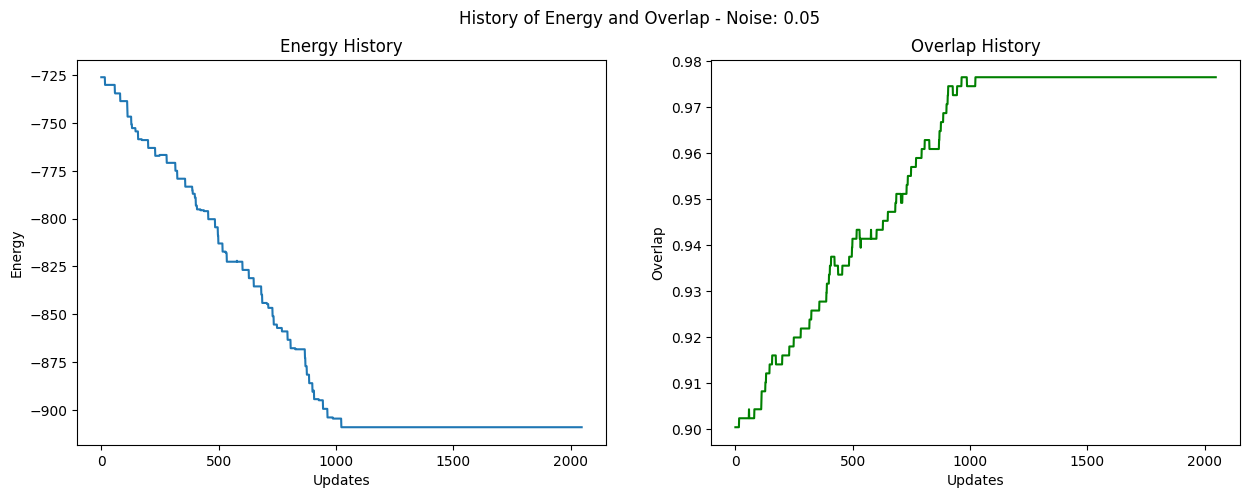

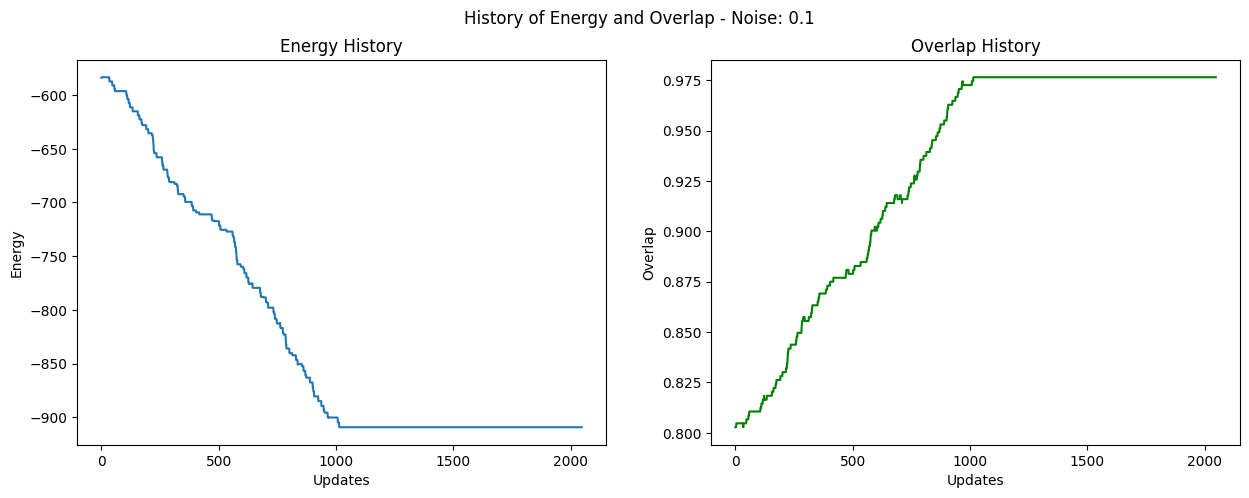

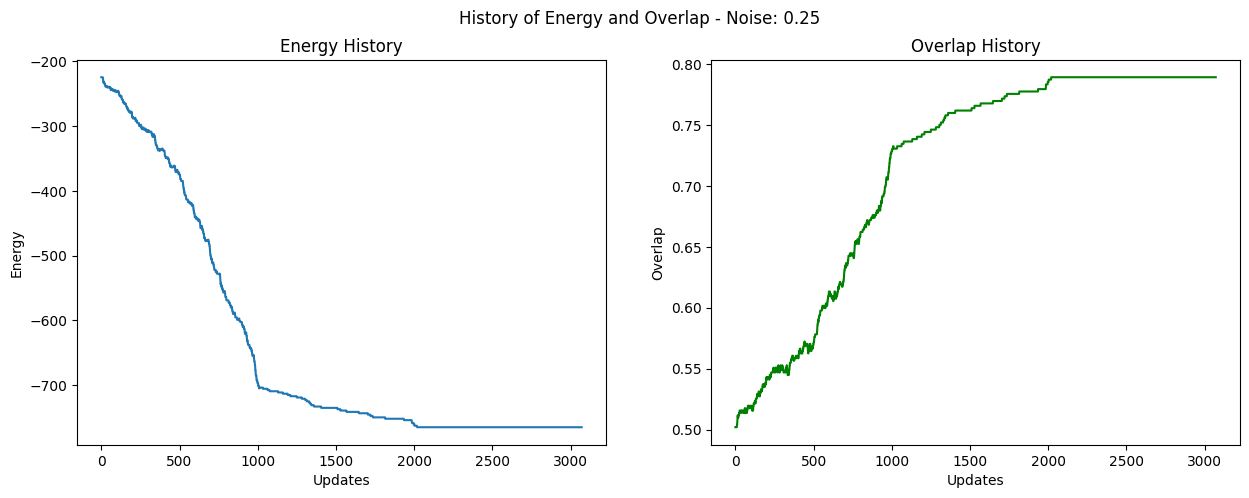

In [15]:
plot_history(e05_history, o05_history, noise=0.05)
plot_history(e10_history, o10_history, noise=0.10)
plot_history(e25_history, o25_history, noise=0.25)

## Bonus Assignment: Synthetic data